# Module 3 Monte Carlo Simulation

## Normal Distribution

In [ ]:
%matplotlib inline

In [ ]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
x = sp.arange(-3,3,0.01)
y=stats.norm.pdf(x)
plt.plot(x,y)
plt.title("A standard normal distribution")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Random Number

In [ ]:
sp.random.seed(12345) 
sp.random.standard_normal(10)

In [ ]:
mean=0.1
std=0.2
sp.random.normal(mean,std,10) 

### Exercise

In [ ]:
sp.random.seed(12345) 
mean=0.1
std=0.2
n=1000
x=sp.random.normal(mean,std,n) 
plt.hist(x, 15, normed=True) 
plt.title("Histogram for random numbers drawn from a normal distribution")
plt.annotate("mean="+str(mean),xy=(0.6,1.5))
plt.annotate("std="+str(std),xy=(0.6,1.4))
plt.show()


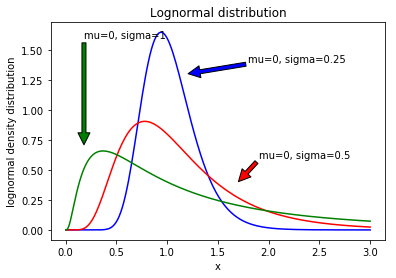

In [13]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt 
from scipy import sqrt,exp,log,pi
#
x=np.linspace(0.001,3,200)
mu=0 
sigma0=[0.25,0.5,1]
color=['blue','red','green'] 
target=[(1.2,1.3),(1.7,0.4),(0.18,0.7)]
start=[(1.8,1.4),(1.9,0.6),(0.18,1.6)]
#
for i in sp.arange(len(sigma0)):
    sigma=sigma0[i]
    y=1/(x*sigma*sqrt(2*pi))*exp(-(log(x)-mu)**2/(2*sigma*sigma))
    plt.annotate('mu='+str(mu)+', sigma='+str(sigma),xy=target[i],xytext=start[i],arrowprops=dict(facecolor=color[i],shrink=0.01),) 
    plt.plot(x,y,color[i])
    plt.title('Lognormal distribution') 
    plt.xlabel('x')
    plt.ylabel('lognormal density distribution') 
#
plt.show()

### Stock Price Simulation

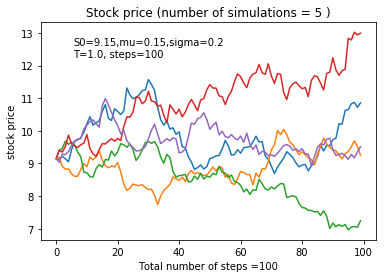

In [19]:
import scipy as sp 
import matplotlib.pyplot as plt
# input area
stock_price_today = 9.15 # stock price at time zero 
T =1.                    # maturity date (in years) 
n_steps=100.             # number of steps 
mu =0.15                 # expected annual return 
sigma = 0.2              # annualized volatility
sp.random.seed(12345)    # fixed our seed 
n_simulation = 5         # number of simulations 
dt =T/n_steps 
#
S = sp.zeros([100], dtype=float) 
x = range(0, 100, 1) 
for j in range(0, n_simulation): 
    S[0]= stock_price_today 
    for i in x[:-1]: 
        e=sp.random.normal() 
        S[i+1]=S[i]+S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e; 
    plt.plot(x, S)
#
plt.figtext(0.2,0.8,'S0='+str(S[0])+',mu='+str(mu)+',sigma='+str(sigma)) 
plt.figtext(0.2,0.76,'T='+str(T)+', steps='+str(int(n_steps))) 
plt.title('Stock price (number of simulations = %d ' % n_simulation +')') 
plt.xlabel('Total number of steps ='+str(int(n_steps))) 
plt.ylabel('stock price') 
plt.show()

## Uniform Random Number

In [14]:
sp.random.uniform(low=1,high=100,size=10) 

array([99.407444  , 68.01049747, 79.29142927, 17.92051152,  3.6580783 ,
       80.23665415, 90.46853128,  3.44294483, 49.68298453, 53.09926157])

## MC Simuilation for Pi Value

In [15]:
import scipy as sp 
n=100000
x=sp.random.uniform(low=0,high=1,size=n) 
y=sp.random.uniform(low=0,high=1,size=n) 
dist=sp.sqrt(x**2+y**2) 
in_circle=dist[dist<=1] 
our_pi=len(in_circle)*4./n
print ('pi=',our_pi)
print('error (%)=', (our_pi-sp.pi)/sp.pi)


pi= 3.14172
error (%)= 4.0535621338818576e-05


 ## MC Simulation for BS Model 

In [21]:
import scipy as sp 
from scipy import zeros, sqrt, shape 
#
S0 = 40.              # stock price at time zero 
X= 40.                # exercise price 
T =0.5                # years 
r =0.05               # risk-free rate 
sigma = 0.2           # annualized volatility 
n_steps=100.          # number of steps 
#
sp.random.seed(12345) # fix those random numbers 
n_simulation = 5000   # number of simulation 
dt =T/n_steps 
call = sp.zeros([n_simulation], dtype=float) 
x = range(0, int(n_steps), 1) 
for j in range(0, n_simulation): 
    sT=S0 
    for i in x[:-1]: 
        e=sp.random.normal() 
        sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sqrt(dt)) 
        call[j]=max(sT-X,0) 
#
call_price=sp.mean(call)*sp.exp(-r*T) 
print('call price = ', round(call_price,3)) 


call price =  2.748
